In [43]:
import matplotlib.image as mpimg
image = mpimg.imread('cat1.jpg')
image.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

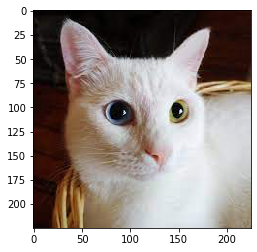

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
#array
im = np.array(Image.open('cat1.jpg'), dtype=np.uint8)
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im)


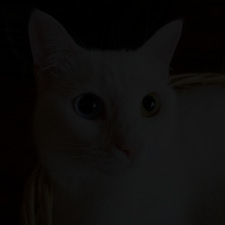

In [45]:
image=Image.open('cat1.jpg')
#image.show()
def colormodification(image):
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            r,g,b=image.getpixel((x,y))
            image.putpixel((x,y),(r//10,g//10,b//10))
    return image
colormodification(image)

In [23]:
# Create a Grayscale version of the image
def convert_grayscale(image):
  # Get size
  width, height = image.size

  # Create new Image and a Pixel Map
  new = create_image(width, height)
  pixels = new.load()

  # Transform to grayscale
  for i in range(width):
    for j in range(height):
      # Get Pixel
      pixel = get_pixel(image, i, j)

      # Get R, G, B values (This are int from 0 to 255)
      red =   pixel[0]
      green = pixel[1]
      blue =  pixel[2]

      # Transform to grayscale
      gray = (red * 0.299) + (green * 0.587) + (blue * 0.114)

      # Set Pixel in new image
      pixels[i, j] = (int(gray), int(gray), int(gray))

    # Return new image
    return new
img=convert_grayscale(image)
img.show()

NameError: name 'create_image' is not defined

In [24]:
def naivezoom(im, px, py, zf, bg):
    out = Image.new(im.mode, im.size)        
    pix = out.load()
    iw, ih = im.size
    for x in range(iw):
        for y in range(ih):
            xorg = x + zf*(px - x)
            yorg = y + zf*(py - y)
            if xorg >= 0 and xorg < iw and yorg >= 0 and yorg < ih:
                pix[x,y] = im.getpixel( (xorg , yorg) )
            else:
                pix[x,y] = bg
    return out
naivezoom(image)

TypeError: naivezoom() missing 4 required positional arguments: 'px', 'py', 'zf', and 'bg'

[[[11  6 10]
  [11  6 10]
  [11  6 10]
  ...
  [36  8  4]
  [39 11  7]
  [36  8  4]]

 [[ 9  4  8]
  [ 9  4  8]
  [ 9  4  8]
  ...
  [44 16 12]
  [44 16 12]
  [46 18 14]]

 [[ 7  3  4]
  [ 7  3  4]
  [ 7  3  4]
  ...
  [41 13  9]
  [43 15 11]
  [48 20 16]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


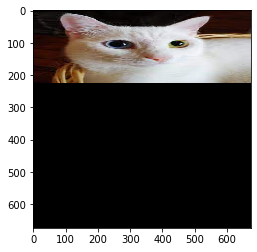

In [25]:
from PIL import Image
import numpy as np
image = np.asarray( Image.open("cat1.jpg") )
import matplotlib.pyplot as plt
# create new image of correct size
m = len(image[0])
n = len(image)
factor = 3
new_image = np.zeros((factor*(n-1) + 1,factor*(m-1) + 1,3), dtype=int)

# implement row zooming
for i in range(n):
    row = image[i]
    for k in range(len(row)-1):
        new_image[i][k*factor], new_image[i][(k+1)*factor] = row[k], row[k+1]
        for mode in range(3):
            # need mode as three colour channels in RGB

            lo = int(min(row[k][mode], row[k+1][mode]))
            hi = int(max(row[k][mode], row[k+1][mode]))
            diff = int((hi-lo)//factor)
            for x in range(factor-1):
                new_image[i][k*factor+1+x][mode] = lo + (x*diff)
plt.imshow(new_image, interpolation='nearest')

print(new_image)



[[[ 36   8   4]
  [ 47  19  15]
  [ 46  18  14]
  ...
  [ 11   6  10]
  [ 11   6  10]
  [ 11   6  10]]

 [[ 46  18  14]
  [ 44  16  12]
  [ 44  16  12]
  ...
  [  9   4   8]
  [  9   4   8]
  [  9   4   8]]

 [[ 48  20  16]
  [ 41  13   9]
  [ 41  13   9]
  ...
  [  7   3   4]
  [  7   3   4]
  [  7   3   4]]

 ...

 [[151 133 113]
  [153 142 114]
  [147 136 108]
  ...
  [ 16   4   4]
  [ 16   4   4]
  [ 16   4   4]]

 [[145 127 107]
  [144 133 105]
  [153 142 114]
  ...
  [ 15   3   3]
  [ 15   3   3]
  [ 16   4   4]]

 [[134 117  91]
  [137 128  99]
  [151 142 113]
  ...
  [ 16   6   7]
  [ 16   6   7]
  [ 16   6   7]]]


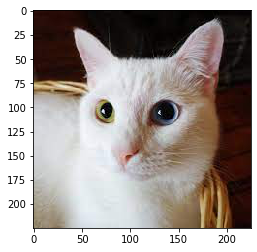

In [124]:
def vertical_flipping(image):
    flip_v=image[::,::-1]
    plt.imshow(flip_v, interpolation='nearest')
    return flip_v
print(vertical_flipping(image))


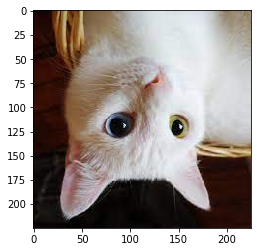

In [26]:
def vertical_flipping(image):
    flip_v=image[-1::-1,::]
    plt.imshow(flip_v, interpolation='nearest')
vertical_flipping(image)

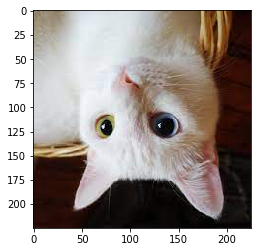

In [27]:
def vertical_flipping(image):
    flip_v=image[::-1,::-1]
    plt.imshow(flip_v, interpolation='nearest')
vertical_flipping(image)

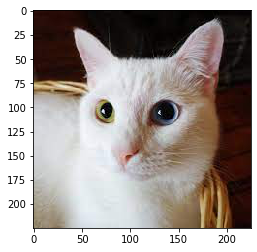

In [28]:
def vertical_flipping(image):
    flip_v=image[::,-1::-1]
    plt.imshow(flip_v, interpolation='nearest')
vertical_flipping(image)

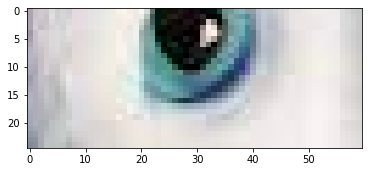

In [40]:
def cropping (image):
    crop=image[100:125,120:180]
    plt.imshow(crop)
cropping(image)

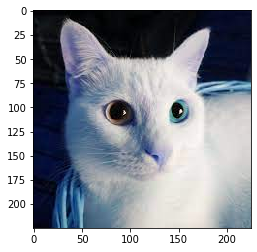

In [39]:

def crop_center(image,cropx,cropy):
    y=255
    x=255
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)  
    image[starty-cropy:starty+cropy,startx-cropy:startx+cropx]
    plt.imshow(image)
crop_center(image,200,1)



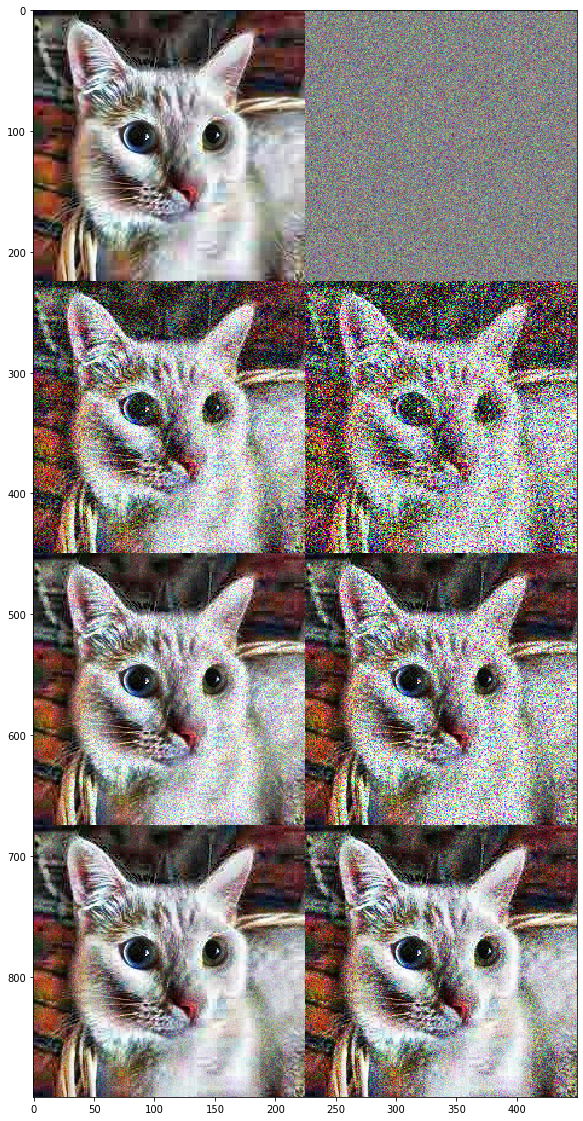

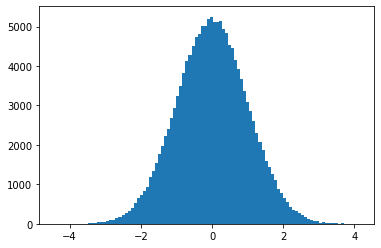

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('cat1.jpg')[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()

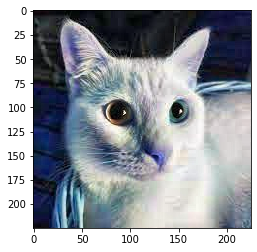

In [48]:
import cv2
image
image = cv2.imread("cat1.jpg")
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
b = clahe.apply(image[:, :, 0])
g = clahe.apply(image[:, :, 1])
r = clahe.apply(image[:, :, 2])
equalized = np.dstack((b, g, r))
cv2.imwrite('cat1.jpg', equalized) 
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(image)